<a href="https://colab.research.google.com/github/samara22vazquez/Machine-Learning-Templates/blob/master/KalmanFIlters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filters

Text(0.5, 1.0, 'autoregressive process')

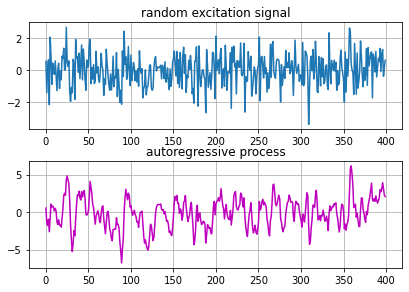

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N=400

ex = np.random.randn(N)

a = np.array([1.2, -0.4])

S= ex.copy();
for n in range(2,N):
  x=np.array([S[n-1],S[n-2]])
  S[n] = np.dot(x,a)+ex[n]

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,4))
plt.tight_layout()

ax[0].plot(range(N),ex)
ax[0].grid(True)
ax[0].set_title("random excitation signal")

ax[1].plot(range(N),S,color='m')
ax[1].grid(True)
ax[1].set_title("autoregressive process")

Text(0.5, 1.0, 'random excitation signal')

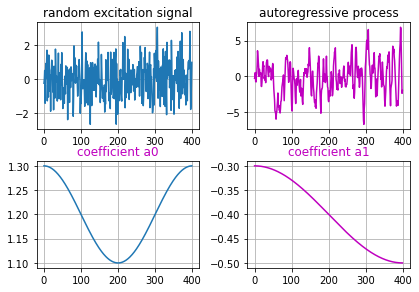

In [ ]:
N=400

ex = np.random.randn(N)


a0 = np.array([1.2, -0.4])
A = np.zeros((N,2))
omega,alpha = N/2, 0.1

for n in range(N):
  A[n,0] = a0[0]+ alpha*np.cos(2*np.pi*n/N)
  A[n,1] = a0[1]+ alpha*np.cos(np.pi*n/N)



S= ex.copy();
for n in range(2,N):
  x=np.array([S[n-1],S[n-2]])
  S[n] = np.dot(x,A[n])+ex[n]

fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(6,4))
plt.tight_layout()

ax[1,0].plot(range(N),A[:,0])
ax[1,0].grid(True)
ax[1,0].set_title("coefficient a0",color='m')

ax[1,1].plot(range(N),A[:,1],color='m')
ax[1,1].grid(True)
ax[1,1].set_title("coefficient a1",color='m')

ax[0,1].plot(range(N),S,color='m')
ax[0,1].grid(True)
ax[0,1].set_title("autoregressive process")

ax[0,0].plot(range(N),ex)
ax[0,0].grid(True)
ax[0,0].set_title("random excitation signal")

[ 1.2 -0.4]
[[ 1.38249824]
 [-0.68268394]]
[ 1.2 -0.4]
[[ 1.38070019]
 [-0.64926853]]
[ 1.2 -0.4]
[[ 1.37333763]
 [-0.62731244]]
[ 1.2 -0.4]
[[ 1.3660652 ]
 [-0.61141219]]
[ 1.2 -0.4]
[[ 1.35928936]
 [-0.59889874]]


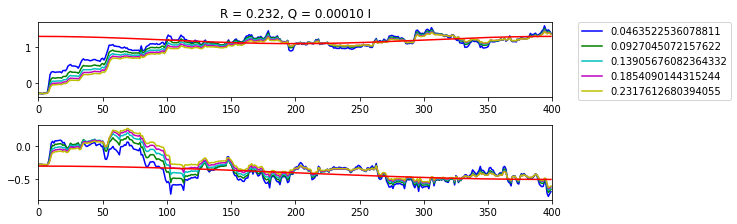

In [ ]:
#th_n_n: estimate at time n using all data upto time n
#th_n_n1: estimate at time n using all data upto time n-1

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,3))
colours = ['b', 'g','c', 'm', 'y', 'k', 'w']

x = np.zeros((2,1))
th_n1_n1_init = np.random.randn(2,1)
P_n1_n1_init = 0.001*np.eye(2)
for i in range(0,5):
  #noise variance hyper parameters to be trained
  #set mesurement noise as fraction of data variance(first few samples)
  #guess for pocess noise
  R_init = (0.05+i*0.05)*np.std(ex[0:10])
  R = R_init
  beta  =.0001
  Q = beta*np.eye(2)
  Q_init= Q
  th_conv = np.zeros([2,N])
  th_n1_n1 = th_n1_n1_init
  P_n1_n1= P_n1_n1_init
  ePlot=np.zeros(500)
  #first two estimates are initial gueses
  th_conv[0,0] =th_n1_n1[0]
  th_conv[0,1] =th_n1_n1[1]
  th_conv[1,0] =th_n1_n1[0]
  th_conv[1,1] =th_n1_n1[1]

  for n in range(2,N):
    x[0] = S[n-1]
    x[1] = S[n-2]

    th_n_n1 = th_n1_n1.copy()
    P_n_n1 = P_n1_n1 +Q

    yh = th_n_n1.T @ x
    en= S[n] -yh
    ePlot[n] = en

    den = x.T @ P_n_n1 @ x +R
    kn= P_n_n1 @x/den

    th_n_n = th_n_n1 +kn*en
    P_n_n = (np.eye(2) - kn @ x.T) @ P_n_n1

    th_conv[0,n] = th_n_n[0]
    th_conv[1,n] = th_n_n[1]

    th_n1_n1 = th_n_n.copy()
    P_n1_n1 = P_n_n.copy()

  plt.tight_layout()

  ax[0].plot(th_conv[0],color = colours[i],label = str(R_init))
  ax[0].set_xlim(0,400)
  


  ax[1].plot(th_conv[1], color = colours[i],label = str(R_init))
  ax[1].set_xlim(0,400)
  
#ax[1].axhline(y=a[1],color='r')
ax[0].set_title("R = %4.3f, Q = %6.5f I"%(R,beta))
ax[1].plot(range(N),A[:,1],color='r')
ax[0].plot(range(N),A[:,0],color='r')

ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig("kalman filter with 5 different initial conditions.png")



# Particle Filters

Text(0.5, 1.0, 'initail particles')

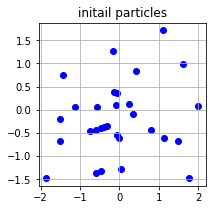

In [ ]:
Ns = 30

parts = np.random.randn(Ns, 2)
parts_saved = parts
fig,ax = plt.subplots(figsize = (3,3))
ax.scatter(parts[:,0],parts[:,1],color='b')
ax.grid(True)
ax.set_title("initail particles")

Text(0.5, 1.0, 'final particles')

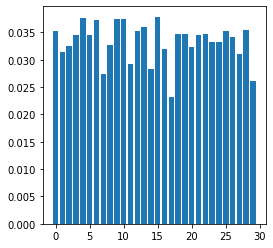

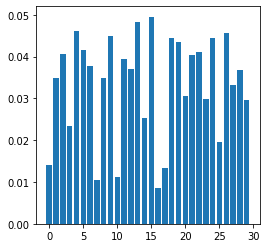

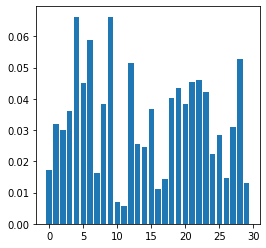

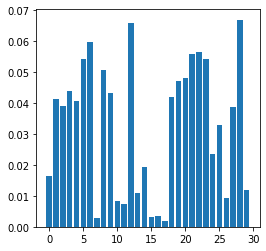

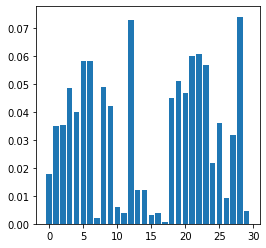

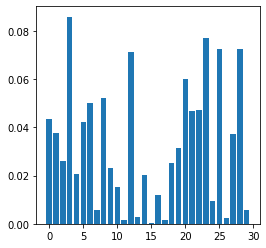

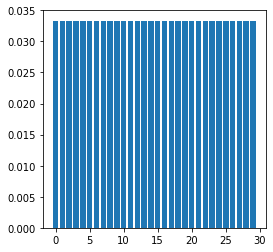

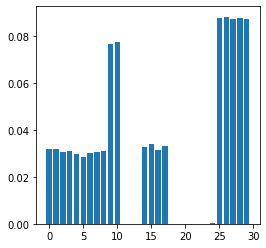

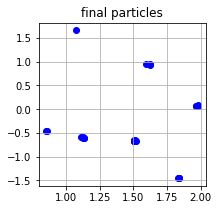

In [ ]:
def particle_likelyhood(y0, yh, sig):
  lhood = (1/(2*np.pi*sig))*np.exp(-0.5*(y0-yh)**2)
  return lhood

parts = parts_saved
beta = 0.01

sig = np.std(ex)

x = np.zeros((2,1))
pweights = np.ones((Ns,1)) / Ns

for n in range(2,10):
  x[0] = S[n-1]
  x[1] = S[n-2]

  for p in range(Ns):
    parts[p,:] = parts[p,:] + beta*np.random.randn(1,2)

  sh = np.zeros((Ns,1))
  lhoods = sh.copy()
  for p, particle in enumerate(parts):
    th = particle.T.copy()
    sh[p] = x.T @th
    lhoods[p] = particle_likelyhood(S[n],sh[p],sig)
  pweights = pweights * lhoods
  pweights = pweights / np.sum(pweights)

  #####check divergence
  
  if(1/((np.sum(pweights**2))) <= (Ns/2)):
    #print(np.sum(pweights))

    new_weights = np.zeros((Ns,1))
    new_parts = np.zeros((Ns, 2))
    
    CDF = np.zeros((Ns,1))
    CDF[0] = pweights[0]
    for i in range (1,Ns):
      CDF[i] = CDF[i-1] + pweights[i]
      
    #print(CDF[-1])
    
    i=0

    u1 = np.random.uniform(0,1/(Ns))
    for j in range(0,Ns):
      u = u1 + ((j)/Ns)

      while (u > CDF[i]):

        #print(i)
        i+=1
      new_parts[j,:] = parts[i,:]
      new_weights[j] = 1/Ns
    
    parts = new_parts
    pweights = new_weights
    
      


  ##run resampling algorithm

  fix,ax = plt.subplots(figsize=(4,4))
  ax.bar(np.arange(len(pweights)),pweights[:,0])

plt.savefig("degeneracy.png")
fig,ax = plt.subplots(figsize = (3,3))
ax.scatter(parts[:,0],parts[:,1],color='b')
ax.grid(True)
ax.set_title("final particles")

Text(0.5, 1.0, 'final particles')

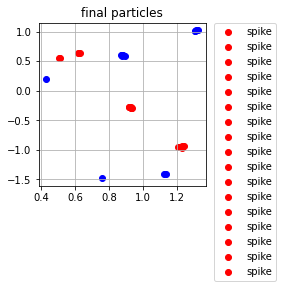

In [ ]:
fig,ax = plt.subplots(figsize = (3,3))

for i in range (len(pweights)):
  if (pweights[i] > 0.03):
    ax.scatter(parts[i,0],parts[i,1],color='r',label="spike")
  elif (pweights[i]>1):
    ax.scatter(parts[i,0],parts[i,1],color='m',label="middle peak")
  elif(pweights[i]>2):
    ax.scatter(parts[i,0],parts[i,1],color='g',label ="small point")
  else:
    ax.scatter(parts[i,0],parts[i,1],color = 'b')
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title("final particles")

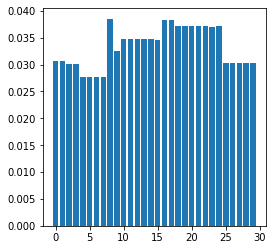

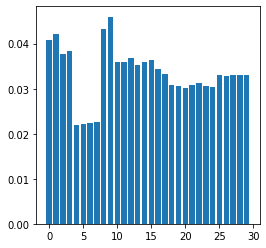

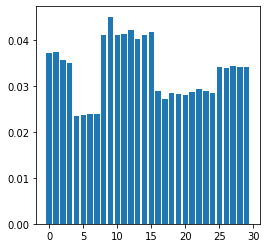

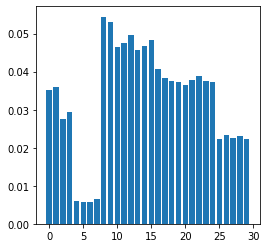

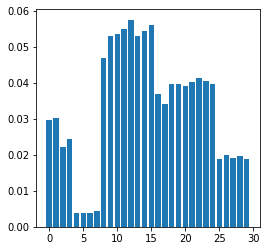

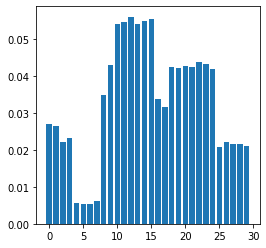

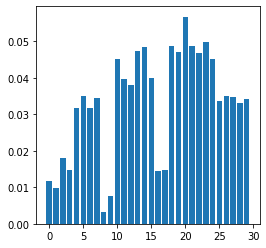

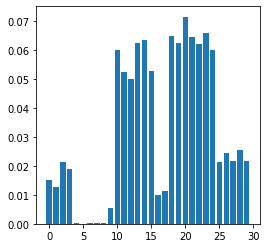

In [ ]:
beta = 0.01

sig = np.std(ex)

x = np.zeros((2,1))
pweights = np.ones((Ns,1)) / Ns

for n in range(2,10):
  x[0] = S[n-1]
  x[1] = S[n-2]

  for p in range(Ns):
    parts[p,:] = parts[p,:] + beta*np.random.randn(1,2)

  sh = np.zeros((Ns,1))
  lhoods = sh.copy()
  for p, particle in enumerate(parts):
    th = particle.T.copy()
    sh[p] = x.T @th
    lhoods[p] = particle_likelyhood(S[n],sh[p],sig)
  pweights = pweights * lhoods
  pweights = pweights / np.sum(pweights)
  

  fix,ax = plt.subplots(figsize=(4,4))
  ax.bar(np.arange(len(pweights)),pweights[:,0])



# Extended Kalman Filter

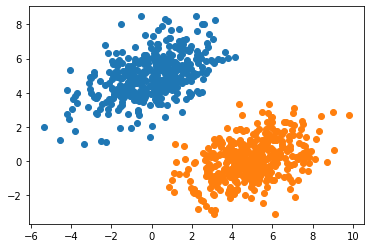

In [ ]:
N=400

ex = np.random.randn(N)

m1 = np.array([0,5])
m2 = np.array([5,0])

C=np.array([[2,1],[1,2]])

A = np.linalg.cholesky(C)

X1 = np.random.randn(N,2)
Y1 = X1@A +m1


X2 = np.random.randn(N,2)
Y2 = X2@A +m2


Y = np.concatenate((Y1,Y2))
plt.scatter(Y1[:,0],Y1[:,1])
plt.scatter(Y2[:,0],Y2[:,1])
plt.show()

800


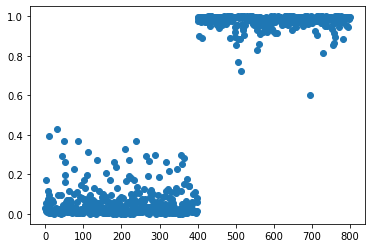

In [ ]:
def sig(th,x):
  """

  returns the sigmoid fucntion for the observations

  """
  return (1/(1 + np.exp(-th.T@x)))

def grad_sig(th,x):
  """
    return the gradtien of the sigmoid at a given point
  """
  a = x*np.exp(-th.T@x)
  b = (1+np.exp(-th.T@x))**2
  return np.reshape(a/b,(2,1))

ey = np.random.randn(N)
print(len(Y))
H = np.random.randn(800)
y = H.copy()
for n in range(800):
  H[n] = sig(np.asarray([0.9538,-0.6967]),Y[n])
  y[n] = n


plt.scatter(y,H)
plt.show()

[[ 0.81659727]
 [-0.8892761 ]]
[1.08900204]


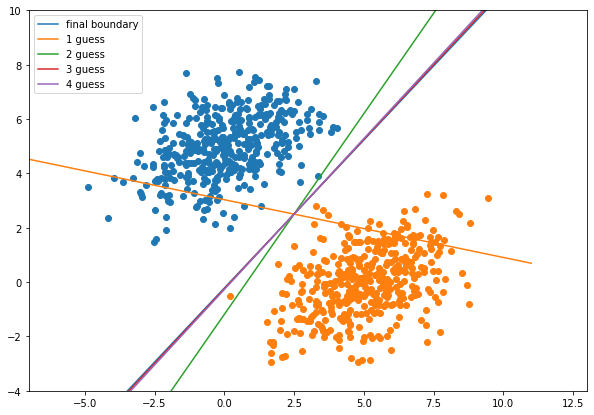

In [ ]:
#th_n_n: estimate at time n using all data upto time n
#th_n_n1: estimate at time n using all data upto time n-1
from sklearn.model_selection import train_test_split
N=400
fig,ax = plt.subplots(figsize = (10,7))
ex = np.random.randn(N)

m1 = np.array([0,5])
m2 = np.array([5,0])

C=np.array([[2,1],[1,2]])

A = np.linalg.cholesky(C)

X1 = np.random.randn(N,2)
Y1 = X1@A +m1


X2 = np.random.randn(N,2)
Y2 = X2@A +m2


Y = np.concatenate((Y1,Y2))
ax.scatter(Y1[:,0],Y1[:,1])
ax.scatter(Y2[:,0],Y2[:,1])
L=[]
for i in range(N):
  L.append(0)
for i in range(N):
  L.append(1)

L = np.asarray(L)



Y,j,L,s=train_test_split(Y,L,test_size=0.01,random_state=99)

  
#initialise theta at previous time step randomly and
#the covariance matrix
th_n1_n1 = np.random.randn(2,1)
P_n1_n1 = 0.001*np.eye(2)

#noise variance hyper parameters to be trained
#set mesurement noise as fraction of data variance(first few samples)
#guess for pocess noise
R = 0.2*np.std(ex[0:10])
beta  =.0001
Q = beta*np.eye(2)

th_conv = np.zeros([2,len(L)])

ePlot=np.zeros(len(L))

#first two estimates are initial gueses
th_conv[0,0] =th_n1_n1[0]
th_conv[1,0] =th_n1_n1[1]


for n in range(1,len(L)):

  #guess of theta at next time step is the same at the theta
  #of previous time step given the previous time step
  #the P covariance matrix moves linearly with Q
  th_n_n1 = th_n1_n1.copy()
  P_n_n1 = P_n1_n1 +Q

  #update prediction (yh) and find error (en)
  yh = sig(th_n_n1 , Y[n])
  en= L[n] -yh
  ePlot[n] = en

  #undate the denominator and use it to find the kn
  #rather than using the data at the last 2 time steps
  #the gradient of the sigmoid is used because it is
  #a non linear function
  den = grad_sig(th_n_n1,Y[n]).T @ P_n_n1 @ grad_sig(th_n_n1,Y[n]) +R
  kn= P_n_n1 @grad_sig(th_n_n1,Y[n])/den

  #update of the theta and covariance
  th_n_n = th_n_n1 +kn*en
    
  P_n_n = (np.eye(2) - kn @ grad_sig(th_n_n1,Y[n]).T) @ P_n_n1

  th_conv[0,n] = th_n_n[0]
  th_conv[1,n] = th_n_n[1]
  #update for next time step
  th_n1_n1 = th_n_n.copy()
  P_n1_n1 = P_n_n.copy()


print(th_n_n)
grad = th_n_n[0]/th_n_n[1]
grad = -1/grad
print(grad)
y=[]
x=[]
c = 2.5 - grad*2.5 
for i in range(-7,12):
  y.append(float(grad*i+c))
  x.append(i)
      


ax.plot(x,y,label = "final boundary")
for i in range(0,4):
  grad = th_conv[0][int(i*len(L)/4)]/th_conv[1][int(i*len(L)/4)]
  grad = -1/grad

  y=[]
  x=[]
  c = 2.5 - grad*2.5 
  for j in range(-7,12):
    y.append(float(grad*j+c))
    x.append(j)
      
  ax.plot(x,y,label = str(i+1)+" guess")

ax.set_ylim(-4,10)
ax.set_xlim(-7,13)
ax.legend()

#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


#ax[1].axhline(y=a[1],color='r')
